In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

from behav_analysis import Participant_Behav
from data_functions import load_results


In [2]:
par_num = "01"
par = Participant_Behav(par_num, adj_ts_markers=True)

In [3]:
behav_results = load_results(par.processed_data_dir, "n_back")
behav_results

,participant,sex,age,hours_of_sleep,trial,block,match,stim_start,stim_end,inter_stim_start,inter_stim_end,correct_response,response_time
0,1,M,25,8.0,1,1_back,0.0,1.655323e+09,1.655323e+09,1.655323e+09,1.655323e+09,1.0,1.287123
1,1,M,25,8.0,1,1_back,0.0,1.655323e+09,1.655323e+09,1.655323e+09,1.655323e+09,1.0,0.667091
2,1,M,25,8.0,1,1_back,0.0,1.655323e+09,1.655323e+09,1.655323e+09,1.655323e+09,1.0,0.495045
3,1,M,25,8.0,1,1_back,0.0,1.655323e+09,1.655323e+09,1.655323e+09,1.655323e+09,1.0,0.514930
4,1,M,25,8.0,1,1_back,0.0,1.655323e+09,1.655323e+09,1.655323e+09,1.655323e+09,1.0,0.390993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,15,M,21,4.0,9,1_back,1.0,1.668111e+09,1.668111e+09,1.668111e+09,1.668111e+09,1.0,0.456335
2696,15,M,21,4.0,9,1_back,1.0,1.668111e+09,1.668111e+09,1.668111e+09,1.668111e+09,1.0,0.412352
2697,15,M,21,4.0,9,1_back,0.0,1.668111e+09,1.668111e+09,1.668111e+09,1.668111e+09,1.0,0.560273
2698,15,M,21,4.0,9,1_back,0.0,1.668111e+09,1.668111e+09,1.668111e+09,1.668111e+09,1.0,0.564337


C:\Users\zackg\AppData\Local\Temp\ipykernel_14472\3793362363.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  block_data = df.groupby("block").mean()[["response_time", "correct_response"]]
C:\Users\zackg\AppData\Local\Temp\ipykernel_14472\3793362363.py:11: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  block_sem = df.groupby("block").agg(lambda x: sem(x, nan_policy="omit"))[


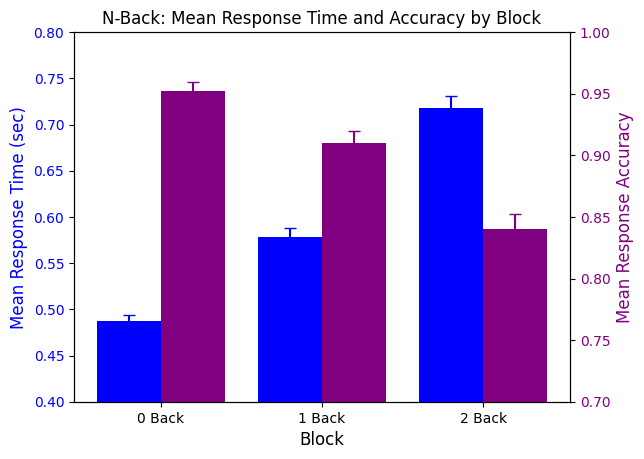

In [4]:
# Load the data
df = behav_results

# Group the data by block and calculate the mean response time and mean correct response
block_data = df.groupby("block").mean()[["response_time", "correct_response"]]
block_sem = df.groupby("block").agg(lambda x: sem(x, nan_policy="omit"))[
    ["response_time", "correct_response"]
]

# Create a figure with two subplots
fig, ax1 = plt.subplots()

# Plot the mean response time on the left y-axis
ax1.bar(
    np.arange(len(block_data)),
    block_data["response_time"],
    color="blue",
    width=0.4,
    yerr=block_sem["response_time"],
    capsize=4,
    zorder=0,
    ecolor="blue",
)
ax1.set_xlabel("Block", fontsize=12)
ax1.set_ylabel("Mean Response Time (sec)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim([0.4, 0.8])

# Create a second y-axis for the mean correct response
ax2 = ax1.twinx()
ax2.bar(
    np.arange(len(block_data)) + 0.4,
    block_data["correct_response"],
    color="purple",
    width=0.4,
    yerr=block_sem["correct_response"],
    capsize=4,
    zorder=0,
    ecolor="purple",
)
ax2.set_ylabel("Mean Response Accuracy", color="purple", fontsize=12)
ax2.tick_params(axis="y", labelcolor="purple")
ax2.set_ylim([0.7, 1.0])

# Set the x-axis tick labels to the block names
ax1.set_xticks(np.arange(len(block_data)) + 0.2)
ax1.set_xticklabels([block.replace("_", " ").title() for block in block_data.index])

# Add a title and show the plot
plt.title("N-Back: Mean Response Time and Accuracy by Block")
plt.show()


C:\Users\zackg\AppData\Local\Temp\ipykernel_14472\939799898.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  block_data = df.groupby("block").mean()[["response_time", "correct_response"]]
C:\Users\zackg\AppData\Local\Temp\ipykernel_14472\939799898.py:11: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  block_sem = df.groupby("block").agg(lambda x: sem(x, nan_policy="omit"))[


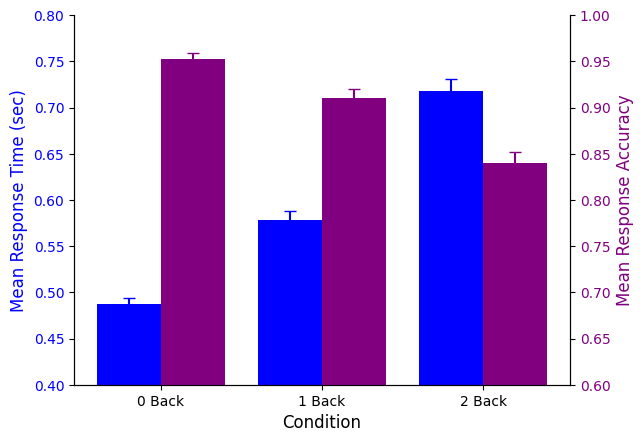

In [5]:
# Load the data
df = behav_results

# Group the data by block and calculate the mean response time and mean correct response
block_data = df.groupby("block").mean()[["response_time", "correct_response"]]
block_sem = df.groupby("block").agg(lambda x: sem(x, nan_policy="omit"))[
    ["response_time", "correct_response"]
]

# Create a figure with two subplots
fig, ax1 = plt.subplots()

# Plot the mean response time on the left y-axis
ax1.bar(
    np.arange(len(block_data)),
    block_data["response_time"],
    color="blue",
    width=0.4,
    yerr=block_sem["response_time"],
    capsize=4,
    zorder=0,
    ecolor="blue",
)
ax1.set_xlabel("Condition", fontsize=12)
ax1.set_ylabel("Mean Response Time (sec)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim([0.4, 0.8])

# Create a second y-axis for the mean correct response
ax2 = ax1.twinx()
ax2.bar(
    np.arange(len(block_data)) + 0.4,
    block_data["correct_response"],
    color="purple",
    width=0.4,
    yerr=block_sem["correct_response"],
    capsize=4,
    zorder=0,
    ecolor="purple",
)
ax2.set_ylabel("Mean Response Accuracy", color="purple", fontsize=12)
ax2.tick_params(axis="y", labelcolor="purple")
ax2.set_ylim([0.6, 1.0])
# ax2.set_ylim([0.7, 1.0])

# Set the x-axis tick labels to the block names
ax1.set_xticks(np.arange(len(block_data)) + 0.2)
ax1.set_xticklabels([block.replace("_", " ").title() for block in block_data.index])

# Add a title and show the plot
# plt.title("N-Back: Mean Response Time and Accuracy by Block")
ax1.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)
plt.show()

C:\Users\zackg\AppData\Local\Temp\ipykernel_14472\1095359694.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  block_data = df.groupby("block").mean()[["response_time", "correct_response"]]
C:\Users\zackg\AppData\Local\Temp\ipykernel_14472\1095359694.py:11: FutureWarning: ['sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  block_sem = df.groupby("block").agg(lambda x: sem(x, nan_policy="omit"))[


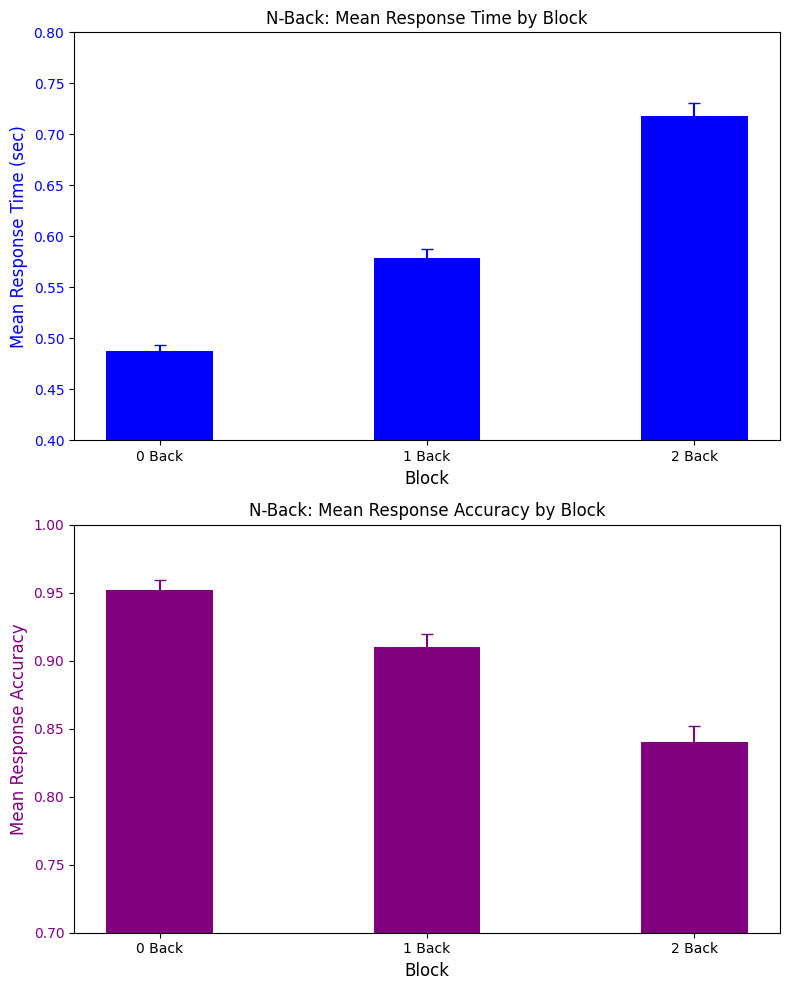

In [6]:
# Load the data
df = behav_results

# Group the data by block and calculate the mean response time and mean correct response
block_data = df.groupby("block").mean()[["response_time", "correct_response"]]
block_sem = df.groupby("block").agg(lambda x: sem(x, nan_policy="omit"))[
    ["response_time", "correct_response"]
]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plot the mean response time on the left y-axis
ax1.bar(
    np.arange(len(block_data)),
    block_data["response_time"],
    color="blue",
    width=0.4,
    yerr=block_sem["response_time"],
    capsize=4,
    zorder=0,
    ecolor="blue",
)
ax1.set_xlabel("Block", fontsize=12)
ax1.set_ylabel("Mean Response Time (sec)", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim([0.4, 0.8])
ax1.set_xticks(np.arange(len(block_data)))
ax1.set_xticklabels([block.replace("_", " ").title() for block in block_data.index])
ax1.set_title("N-Back: Mean Response Time by Block")

# Plot the mean correct response on the right y-axis
ax2.bar(
    np.arange(len(block_data)),
    block_data["correct_response"],
    color="purple",
    width=0.4,
    yerr=block_sem["correct_response"],
    capsize=4,
    zorder=0,
    ecolor="purple",
)
ax2.set_xlabel("Block", fontsize=12)
ax2.set_ylabel("Mean Response Accuracy", color="purple", fontsize=12)
ax2.tick_params(axis="y", labelcolor="purple")
ax2.set_ylim([0.7, 1.0])
ax2.set_xticks(np.arange(len(block_data)))
ax2.set_xticklabels([block.replace("_", " ").title() for block in block_data.index])
ax2.set_title("N-Back: Mean Response Accuracy by Block")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()
